In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Importation des données

In [2]:
positif = pd.read_pickle(r'data/imdb_raw_pos.pickle')
negatif = pd.read_pickle(r'data/imdb_raw_neg.pickle')
print('COMMENTAIRE Positif ',len(positif))
print('COMMENTAIRE negatif', len(negatif))

COMMENTAIRE Positif  12500
COMMENTAIRE negatif 12500


## Preprocessing

In [4]:
pos = {'Critiques': positif}
neg = {'Critiques': negatif}

## Create pandas dataframe

In [5]:
# Creates pandas DataFrame.
df1 = pd.DataFrame(pos)
df1['Sentiment'] = 'positif'
df1['Reponse'] = 1
df2 = pd.DataFrame(neg)
df2['Sentiment'] = 'Negatif'
df2['Reponse'] = 0

In [6]:
### CONCAT DATA
data = pd.concat([df1, df2])
data

,Critiques,Sentiment,Reponse
0,I went and saw this movie last night after bei...,positif,1
1,Actor turned director Bill Paxton follows up h...,positif,1
2,As a recreational golfer with some knowledge o...,positif,1
3,"I saw this film in a sneak preview, and it is ...",positif,1
4,Bill Paxton has taken the true story of the 19...,positif,1
...,...,...,...
12495,I occasionally let my kids watch this garbage ...,Negatif,0
12496,When all we have anymore is pretty much realit...,Negatif,0
12497,The basic genre is a thriller intercut with an...,Negatif,0
12498,Four things intrigued me as to this film - fir...,Negatif,0


## SHUFFLE DATA

In [7]:
# SHUFFLED DATA
shuffled = data.sample(frac=1).reset_index()
shuffled = shuffled.drop(['index'], axis=1)
print(shuffled.head(10))

                                           Critiques Sentiment  Reponse
0  This movie was recommended to me so we went to...   Negatif        0
1  I've read the book 'Scarlett' and was expectin...   Negatif        0
2  Words almost fail me to describe how terrible ...   Negatif        0
3  Background info - The movies Octopussy & Never...   positif        1
4  I hired the DVD yesterday and first of all it ...   Negatif        0
5  This movie was an embarrassment. Ulma Thurman ...   Negatif        0
6  Anyone who has seen Ali G before, should be we...   positif        1
7  Another sadistic and ultra-sleazy late 70's/ea...   Negatif        0
8  Well, the Hero and the Terror is slightly belo...   Negatif        0
9  This movie was so bad If anyone out their who ...   Negatif        0


In [8]:
X = shuffled.Critiques
y = shuffled.Reponse

In [9]:
X[:2]

0    This movie was recommended to me so we went to...
1    I've read the book 'Scarlett' and was expectin...
Name: Critiques, dtype: object

In [10]:
y[:2]

0    0
1    0
Name: Reponse, dtype: int64

# SPLIT DATA

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size= 0.2)

In [18]:
print('longuer de X train :', len(X_train))
print('longuer de y train :', len(y_train))
print('longuer de X test :', len(X_test))
print('longuer de y test :', len(y_test))

longuer de X train : 20000
longuer de y train : 20000
longuer de X test : 5000
longuer de y test : 5000


# VECTORISATION

- transfromation des données cathegorielles en quantitafives

In [20]:
vect = CountVectorizer(stop_words='english', ngram_range = (1,1), max_df = .80, min_df = 4)

In [21]:
vect.fit(X_train)

CountVectorizer(max_df=0.8, min_df=4, stop_words='english')

In [23]:
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

In [24]:
X_train_vect

<20000x26751 sparse matrix of type '<class 'numpy.int64'>'
	with 1688860 stored elements in Compressed Sparse Row format>

# SCALER DATA

In [45]:
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler

In [54]:
transformer = MaxAbsScaler().fit(X_train_vect)

In [56]:
transformer_Xtrain = transformer.transform(X_train_vect)

In [57]:
transformer_Xtrain

<20000x26751 sparse matrix of type '<class 'numpy.float64'>'
	with 1688860 stored elements in Compressed Sparse Row format>

# FIRST MODEL Logistic Regression

In [110]:
#Accuracy using Logistic Regression Model
LR = LogisticRegression()

LogisticRegression()

In [111]:
LR.fit(transformer_Xtrain, y_train)

LogisticRegression()

### PREDICTION

In [112]:
y_pred2 = LR.predict(X_test_vect)

In [113]:
print('\nLogistic Regression')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred2)*100,'%',sep='')


Logistic Regression
Accuracy Score: 86.6%


### CONFUSION MATRIX

In [114]:
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred2), sep = '\n')

Confusion Matrix: 
[[2207  310]
 [ 360 2123]]


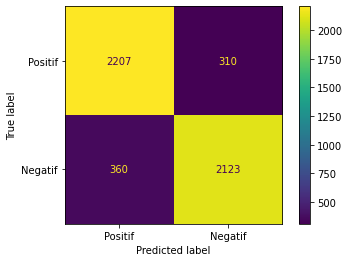

In [69]:
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positif', 'Negatif'])
disp.plot()
plt.show()

# 2rd MODEL

### Create Model SVM

In [74]:
SVM = LinearSVC()

### FIT MODEL

In [77]:
SVM.fit(transformer_Xtrain, y_train)

LinearSVC()

### Predict model

In [82]:
y_pred3 = SVM.predict(X_test_vect)

In [83]:
print('\nSupport Vector Machine')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred3)*100,'%',sep='')


Support Vector Machine
Accuracy Score: 86.24000000000001%


### Confusion matrix

In [84]:
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred3), sep = '\n')

Confusion Matrix: 
[[2156  361]
 [ 327 2156]]


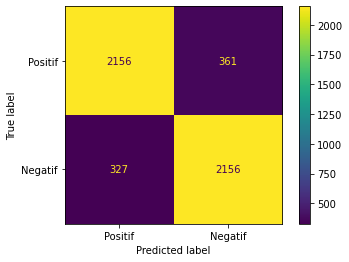

In [85]:
cm = confusion_matrix(y_test, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positif', 'Negatif'])
disp.plot()
plt.show()

# TEST MODEL LG

In [124]:
test = []
test.append(input())
test_vect = vect.transform(test)
predLabel = LR.predict(test_vect)
tags = ['Negative','Positive']
print("Le model à prédict que votre commentaire est ",tags[predLabel[0]])

Le model à prédict que votre commentaire est  Negative
